In [1]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

folder_path = "C:/Users/heung/OneDrive/Documents/scData/14. GSE136001_RAW/"

# Load file

In [5]:
# Load file
adata = sc.read(folder_path + "annotated.h5ad")
adata


AnnData object with n_obs × n_vars = 37255 × 16739
    obs: 'sample', 'sex', 'condition', 'n_genes', 'total_counts', 'pct_counts_mito', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell_type'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'condition_colors', 'dendrogram_cell_type', 'leiden', 'leiden_colors', 'log1p', 'markers', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'scvi_markers', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    varm: 'PCs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [8]:
adata.obs.head()

,sample,sex,condition,n_genes,total_counts,pct_counts_mito,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell_type
AAACCTGAGAGGTTAT-1,f-ctrl-1,female,normal,988,1863.0,2.200752,5.797101,0,0,2,5.367686,Microglia
AAACCTGCAATGGATA-1,f-ctrl-1,female,normal,1681,3707.0,0.998112,6.986782,0,0,0,2.697599,Microglia
AAACCTGCACAGATTC-1,f-ctrl-1,female,normal,1220,2472.0,0.404531,9.061488,0,0,0,4.045308,Microglia
AAACGGGAGGTGACCA-1,f-ctrl-1,female,normal,978,2030.0,2.266010,8.374384,0,0,4,4.926108,Microglia
AAACGGGCATCGGACC-1,f-ctrl-1,female,normal,1095,2075.0,2.361446,8.192771,0,0,1,4.819277,Microglia


In [9]:
# Calculate the number of cells in each batch (sample)
# sample: each sample (control_1, control_2, treated_1, treated_2, etc.)
# condition: each group (treated, control, etc.)
num_tot_cells = adata.obs.groupby(['sample']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells['condition']))
num_tot_cells

C:\Users\heung\AppData\Local\Temp\ipykernel_80568\4183876741.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_tot_cells = adata.obs.groupby(['sample']).count()


{'f-ctrl-1': 4759,
 'f-ctrl-2': 4436,
 'f-tumor-1': 5210,
 'f-tumor-2': 5052,
 'm-ctrl-1': 4438,
 'm-ctrl-2': 4828,
 'm-tumor-1': 3974,
 'm-tumor-2': 4558}

In [10]:
# Calculate the number of cells in each batch (sample) and condition
cell_type_counts = adata.obs.groupby(['sample', 'condition', 'cell_type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]

cell_type_counts.columns.values[3] = 'counts'

# Calculate the frequency of cells in each batch (sample) and condition
# cell_type_counts['total_cell'] = cell_type_counts['sample'].map(num_tot_cells).astype(int)
# cell_type_counts['frequency'] = cell_type_counts.counts / cell_type_counts.total_cell

cell_type_counts

C:\Users\heung\AppData\Local\Temp\ipykernel_80568\2967815716.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata.obs.groupby(['sample', 'condition', 'cell_type']).count()


,sample,condition,cell_type,counts
0,f-ctrl-1,normal,Activated microglia,231
1,f-ctrl-1,normal,B cells,1
2,f-ctrl-1,normal,BAM,139
3,f-ctrl-1,normal,Etc.,29
4,f-ctrl-1,normal,Microglia,4313
5,f-ctrl-1,normal,Mo/Mp,40
6,f-ctrl-1,normal,T cells,6
7,f-ctrl-2,normal,Activated microglia,184
8,f-ctrl-2,normal,BAM,173
9,f-ctrl-2,normal,Etc.,18


In [104]:
# 기본 폰트 말고 Arial 사용 -> 이후 matplotlib plot에서 자동 사용됨
plt.rcParams['font.family'] = 'Arial'

# Cell frequency by samples

In [11]:
# 각 sample 별 cell 수의 총 합
total_counts_sample = cell_type_counts.groupby('sample')['counts'].sum()

# 각 sample 별 cell type의 비율을 frequency column에 저장
cell_type_counts['frequency_sample'] = cell_type_counts['counts'] / cell_type_counts['sample'].map(total_counts_sample).astype(int)

df_sample = pd.pivot_table(cell_type_counts, values = 'frequency_sample', index = 'sample', columns = 'cell_type', aggfunc = 'sum')
df_sample


C:\Users\heung\AppData\Local\Temp\ipykernel_80568\1389395808.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts_sample = cell_type_counts.groupby('sample')['counts'].sum()
C:\Users\heung\AppData\Local\Temp\ipykernel_80568\1389395808.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_sample = pd.pivot_table(cell_type_counts, values = 'frequency_sample', index = 'sample', columns = 'cell_type', aggfunc = 'sum')


cell_type,Activated microglia,B cells,BAM,Etc.,Microglia,Mo/Mp,T cells
sample,,,,,,,
f-ctrl-1,0.048540,0.000210,0.029208,0.006094,0.906283,0.008405,0.001261
f-ctrl-2,0.041479,0.000000,0.038999,0.004058,0.909603,0.005636,0.000225
f-tumor-1,0.278887,0.017850,0.025528,0.003455,0.306718,0.268522,0.099040
f-tumor-2,0.236540,0.001188,0.042162,0.003959,0.525930,0.187846,0.002375
m-ctrl-1,0.044389,0.000000,0.034926,0.004732,0.887562,0.025462,0.002929
m-ctrl-2,0.042875,0.000207,0.043082,0.008699,0.883389,0.021541,0.000207
m-tumor-1,0.309260,0.005284,0.034474,0.001007,0.273528,0.339708,0.036739
m-tumor-2,0.347960,0.001755,0.037297,0.004827,0.372532,0.231022,0.004607


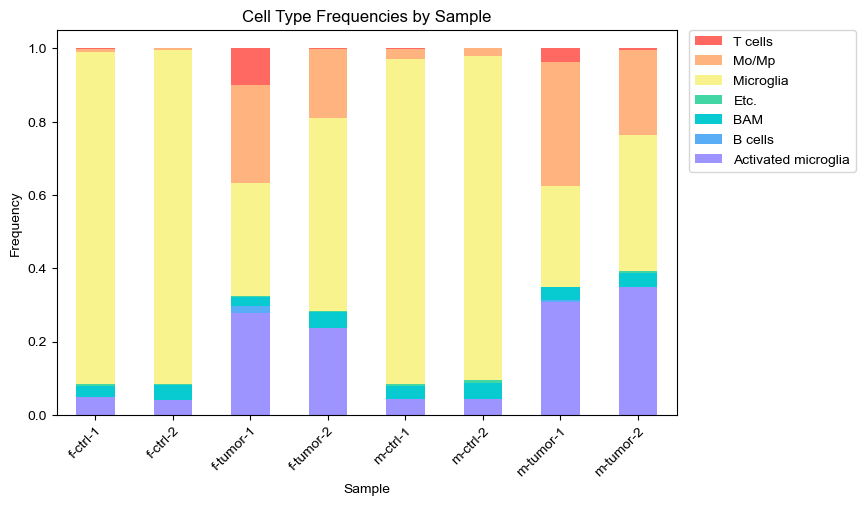

In [105]:
# 그래프 색상 설정
# colors = ['#ff6961', '#ffb480','#f8f38d', '#42d6a4','#08cad1', '#59adf6','#9d94ff', '#c780e8',]
# colors = ['#c780e8', '#9d94ff', '#59adf6', '#08cad1', '#42d6a4', '#f8f38d', '#ffb480', '#ff6961']   # cell_type이 더 많으면 뒤에 추가하면 됨 아니면 반복됨
colors = ['#9d94ff', '#59adf6', '#08cad1', '#42d6a4', '#f8f38d', '#ffb480', '#ff6961']

# 그래프 크기 설정
fig, ax = plt.subplots(figsize = (8, 5))

df_sample.plot(kind = 'bar', stacked = True, color = colors, ax = ax)

plt.title('Cell Type Frequencies by Sample')
plt.xlabel('Sample')
plt.ylabel('Frequency')

plt.xticks(rotation = 45, rotation_mode = 'anchor', ha = 'right')

handles,labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

> 복잡하고 쓸모 없음

# Cell frequency by condition

In [15]:
# 각 condition 별 cell 수의 총 합
total_counts_condition = cell_type_counts.groupby('condition')['counts'].sum()

# 각 sample 별 cell type의 비율을 frequency column에 저장
cell_type_counts['frequency_condition'] = cell_type_counts['counts'] / cell_type_counts['condition'].map(total_counts_condition).astype(int)

df_condition = pd.pivot_table(cell_type_counts, values = 'frequency_condition', index = 'condition', columns = 'cell_type', aggfunc='sum',)
df_condition

C:\Users\heung\AppData\Local\Temp\ipykernel_80568\4200868147.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts_condition = cell_type_counts.groupby('condition')['counts'].sum()
C:\Users\heung\AppData\Local\Temp\ipykernel_80568\4200868147.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_condition = pd.pivot_table(cell_type_counts, values = 'frequency_condition', index = 'condition', columns = 'cell_type', aggfunc='sum',)


cell_type,Activated microglia,B cells,BAM,Etc.,Microglia,Mo/Mp,T cells
condition,,,,,,,
normal,0.044364,0.000108,0.036564,0.005959,0.896593,0.015275,0.001138
tumor,0.290678,0.006811,0.034745,0.003405,0.374588,0.252793,0.036980


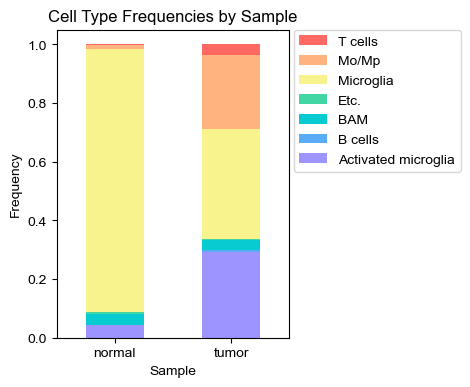

In [110]:
# colors = ['#ff6961', '#ffb480','#f8f38d', '#42d6a4','#08cad1', '#59adf6','#9d94ff', '#c780e8',]
# 순서대로 빨, 주, 노, 초, 청, 파, 보, 보(?) 아마도?

colors = ['#9d94ff', '#59adf6', '#08cad1', '#42d6a4', '#f8f38d', '#ffb480', '#ff6961']   # cell_type이 더 많으면 뒤에 추가하면 됨 아니면 반복됨

fig, ax = plt.subplots(figsize = (3, 4))

df_condition.plot(kind = 'bar', stacked = True, color = colors, ax = ax)

plt.title('Cell Type Frequencies by Sample')
plt.xlabel('Sample')
plt.ylabel('Frequency')

plt.xticks(rotation = 0)

handles,labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

> Tumor sample에서는 microglia의 비율이 줄고, Mo/p와 Activated microglia의 비율이 늘어나는 것을 확인 가능 (논문과 일치)

# Cell numbers by condition

C:\Users\heung\AppData\Local\Temp\ipykernel_80568\3868365076.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


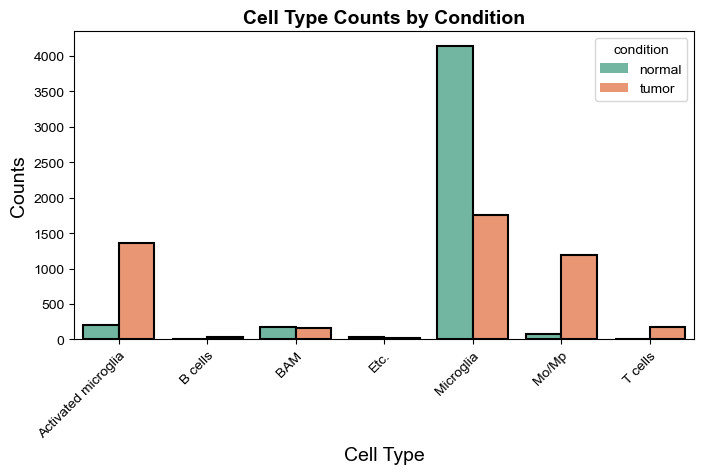

In [107]:
plt.figure(figsize = (8, 4))
plt.rcParams['font.family'] = 'Arial'
palette = {'normal': 'royalblue', 'tumor': 'firebrick'} # 색상 설정


ax = sns.barplot(
    cell_type_counts,
    x = 'cell_type',
    y = 'counts',
    hue = 'condition',
    ci = None,
    palette = 'Set2'    # built-in 색상 설정
    # palette = palette # custom 색상 설정
)

plt.xticks(rotation = 45, rotation_mode = 'anchor', ha = 'right')
ax.set_title('Cell Type Counts by Condition', fontsize = 14, fontweight = 'bold')
ax.set_xlabel('Cell Type', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)

for p in ax.patches:
    p.set_edgecolor('black')
    p.set_linewidth(1.5)
    

# 똥코드
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.1f'),    # .2f: 소수점 둘째자리까지 표시 
#                 (p.get_x() + p.get_width() / 2., p.get_height()), 
#                 ha = 'center', va = 'center', 
#                 xytext = (3, 12), 
#                 textcoords = 'offset points',
#                 rotation=45)


> Non-activated microglia의 수도 실제로 줄어들었음.